# Interpolación de Lagrange

In [1]:
using Plots, LaTeXStrings
pyplot()

Plots.PyPlotBackend()

En el notebook 7, vimos cómo utilizar una discretización de una función continua para calcular numéricamente una derivada.

Un problema muy común en el cómputo científico es el problema opuesto: tener datos discretos, y querer encontrar una función continua que los aproxime. Una manera de hacer esto es la **interpolación**: 

> dados datos $(x_i, y_i)$ para $i=1,\ldots,N$, queremos encontrar una función $f(x)$ que pasa exactamente por los puntos, es decir, tal que $f(x_i) = y_i$ para cada $i$.

Provee, entre muchas otras cosas, una manera de formalizar la derivación de diferencias finitas para calcular derivadas, y para llevar a cabo integrales. Mucho más allá, provee la manera de trabajar con funciones de forma numérica.

Podríamos escoger distintas clases de función $f$ que interpolar. Aquí, trabajaremos con los **polinomios**.

**[1]** El primer caso que tratar es el de dos puntos $(x_1, y_1)$ y $(x_2, y_2)$. Es claro que podemos interpolar dos puntos con una recta. Para encontrar cuál recta es, hacemos lo siguiente.

**(i)** Define una función $L_1(x)$ que es lineal y tal que $L_1(x)$ tome el valor $0$ en $x = x_2$. Ahora haz que también tome el valor $1$ en $x = x_1$.

In [45]:
function L1(x1::Real, x2::Real, x::Real)
    a = (x - x2)/(x1 - x2) 
    return a
end

L1 (generic function with 2 methods)

In [46]:
L1(1, 2, 1)

1.0

In [47]:
L1(1, 2, 2)

-0.0

**(ii)** Por simetría, encuentra la función $L_2(x)$ tal que $L_2(x_1) = 0$ y $L_2(x_2) = 1$.

In [48]:
function L2(x1::Real, x2::Real, x::Real)
    b = (x - x1)/(x2 - x1) 
    return b
end

L2 (generic function with 2 methods)

In [49]:
L2(1, 2, 1)

0.0

In [50]:
L2(1, 2, 2)

1.0

**(iii)** Utiliza $L_1$ y $L_2$ para encontrar un polinomio lineal que interpola los datos.

In [53]:
# Tomando una combinación lineal de L1 y L2. Esta función regresa una función L(x).
function L(x1::Real, y1::Real, x2::Real, y2::Real, x::Real)
    c = y1 * L1(x1, x2, x) + y2 * L2(x1, x2, x) 
    return c
end

L (generic function with 3 methods)

In [54]:
L(1, 1, 2, 2, 1)

1.0

**(iv)** Impleméntalo y dibuja el resultado.

In [68]:
ys = [L(1,1,2,2,rango[i]) for i in 1:length(rango)]

20-element Array{Float64,1}:
  0.0     
  0.526316
  1.05263 
  1.57895 
  2.10526 
  2.63158 
  3.15789 
  3.68421 
  4.21053 
  4.73684 
  5.26316 
  5.78947 
  6.31579 
  6.84211 
  7.36842 
  7.89474 
  8.42105 
  8.94737 
  9.47368 
 10.0     

In [82]:
#rango = collect(linspace(0,10,20));
#ys = []
#for i in 1:length(rango)
#    y = L(1,3,-2,2,rango[i])
#    push!(ys, y)
#end
#return ys

In [64]:
rango = collect(linspace(0,10,20));


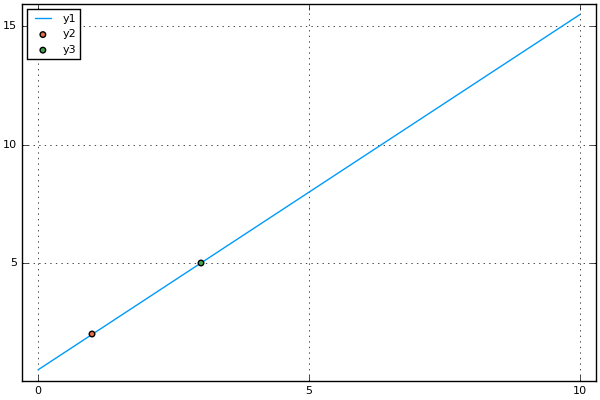

In [81]:
x1, y1 = 1, 2
x2, y2 = 3, 5
rango = collect(linspace(0,10,20))
ys = [L(x1, y1, x2, y2, rango[i]) for i in 1:length(rango)]
plot(rango, ys)
scatter!([x1], [y1])
scatter!([x2], [y2])

**[2]** Ahora generalicemos esto a $N$ puntos:

**(i)** Encuentra un polinomio $L_1(x)$ sencillo, tal que $L_1(x)$ sea igual a $0$ para $x=x_2$, $x=x_3$, ..., $x=x_N$. Ahora normalízalo para que $L_1(x_1) = 1$.

In [84]:
?prod

search: prod prod! produce cumprod cumprod! nextprod prevprod powermod



```
prod(itr)
```

Returns the product of all elements of a collection.

```
prod(A, dims)
```

Multiply elements of an array over the given dimensions.


In [ ]:
function L1N(x::Real, xs::Array{Real,1})
    numerador = []
    denominador = []
    for i in 2:length(xs)
        a = (x - xs[i])
        push!(numerador, a)
        b = ()
        push!(denominador, b)
    end
    n = prod(a)
    d = prod(b)
        
    a = (x - x2)(x - x3)/(x1 - x2)(x1 - x3) 
    return a
end

**(ii)** De manera similar, encuentra $L_i(x)$ que sea igual a $1$ en $x_i$, y que se anule en $x_j$ para $j \neq i$.

**(iii)** Dibuja algunas $L_i$ para $N$ chiquitas. ¡Asegúrate de que sí se comporten correctamente!

**(iv)** Utiliza las $L_i$ para interpolar los datos $(x_i, y_i)_{i=1}^N$ con un polinomio $p$. ¿De qué orden es el polinomio resultante? Nota que $p$ es *único* en el conjunto de polinomios con grado $\le$ el grado de $p$.

**[3]** (i) Escribe una función `interpolar` que acepta un vector de $N$ pares $(x_i, y_i)$, y regresa una función que las interpole. [Pista: Puedes ¡definir una función adentro de la función `interpolar`!, y luego ¡regresar esta función de la función `interpolar`!]

(ii) Toma funciones polinomiales de orden $n$ diferentes, y genera $n+1$ datos al muestrear la función en distintos puntos $x_i$, espaciados de forma uniforme. Dibuja la función original y la función interpolada.

(iii) Ahora toma funciones que *no sean* polinomiales, y haz lo mismo. ¿Qué observas?

**[4]** Considera la función de Runga, $f(x) = \frac{1}{1+25x^2}$, en la región $x \in [-1, 1]$. Interpólala con tu función `interpolar` para distintos números $N$ de puntos. ¿Qué observas? Utiliza `@manipulate`. 

Le que observaste en [4] se llama el **fenómeno de Runge**. Demuestra que en general es una mala idea interpolar en puntos espaciados de forma igual. Sin embargo, resulta que el problema no es la interpolación en sí, sino la elección de puntos donde interpolar.

## Interpolación en puntos espaciados no-uniformemente

Resulta que la solución es tomar puntos en el intervalo $[-1,1]$, espaciados tales que se amontonen cerca de los puntos extremos del intervalo. [La razón por esto se puede entender con la teoría de potenciales ("potential theory"); ver e.g. Trefethen, *Approximation Theory and Approximation Practice*.] 

Lo más común es utilizar los **puntos de Chebyshev** con parámetro $n$, definidos como 

$$x_j := \cos \left( \frac{j \pi}{n} \right) \quad \text{con } 0 \le j \le n.$$

**[5]** (i) Escribe una función que calcula los puntos de Chebyshev para un valor de $n$ dado.

(ii) Escribe una función que interpola una función dada en los puntos de Chebyshev. Grafica los resultados.

(iii) Interpola la función de Runge con puntos de Chebyshev. ¿Qué observas?

**[6]** Dada una función $f$, calcula numéricamente el error al utilizar la interpolación de Chebyshev $p$ con respecto a la función original $f$, dado por la norma

$$\|f - p\|_{\infty} := \sup_x |f(x) - p(x)|,$$

para distintos números de puntos de Chebyshev.

Conforme se aumenta el número de puntos, ¿cómo es la convergencia a $0$ del error?  

**[7]** Resulta que la tasa de convergencia depende de qué tan suave es la función.
Por ejemplo, inténtalo con la función `abs` y con la función `floor`.

## Hacia el futuro

Lo que hemos logrado es reemplazar (aproximar) una función continua $f$ por un conjunto discreto de sus valores $f(x_i)$ en la **malla** $(x_i)_{i=1}^N$. Ahora podremos manipular la función ¡al manipular sólo estos valores discretos!

Resulta que es más útil **cambiar de base** en el espacio de polinomios, y utilizar los **polinomios de Chebyshev**. 

La idea es escribir el polinomio interpolante como una suma de polinomios de Chebyshev y examinar los coeficientes de estos polinomios, que tienen propiedades muy útiles. Esto lo podremos ver hasta después de ver álgebra lineal numérica.  ¡Podría formar un proyecto final interesante!  

### Clase
#### Gráficas en 2 var

In [6]:
#using Plots, LaTeXStrings
#pyplot()

In [7]:
#f(x, y) = x^2 + y^2

In [8]:
#surface(-1:0.1:1, -1:0.1:1, f, c=:greens, fa=0.5)